# Notes

## imports

In [1]:
import os
os.sys.path.insert(0, "/p/user_pub/xclim/persist/software/xsearch/")
import numpy as np
import xcdat as xc
import xsearch as xs

## define target vertical coord and set preset values

In [2]:
cpocean = 3992.0
rhozero = 1035.0
oceanVol = 1.33511e+18
newdepth = np.array([5,10,20,30,40,50,75,100,125,150,200,300,500,700,1000,1500,1800,2000]).astype('f');
newdepth.shape

(18,)

## search for E3SM-2-0 historical sims

In [9]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
#print(dpaths.keys())
sims = xs.getValuesForFacet(dpaths, 'model', 'E3SM-2-0')  # also E3SM-1-0 (E3SM-Project (1-5), UCSB, E3SM-Project), E3SM-1-1 + ECA, E3SM-2-0-NARRM
sims

['/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Omon/thetaoga/gr/v20221112/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r2i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r3i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r4i1p1f1/Omon/thetaoga/gr/v20221114/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r5i1p1f1/Omon/thetaoga/gr/v20221115/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r6i1p1f1/Omon/thetaoga/gr/v20230805/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r7i1p1f1/Omon/thetaoga/gr/v20230811/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r8i1p1f1/Omon/thetaoga/gr/v20230818/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r9i1p1f1/Omon/thetaoga/gr/v20230827/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r10i1p1f1/Omon/thet

## check E3SM-2-0 global curves

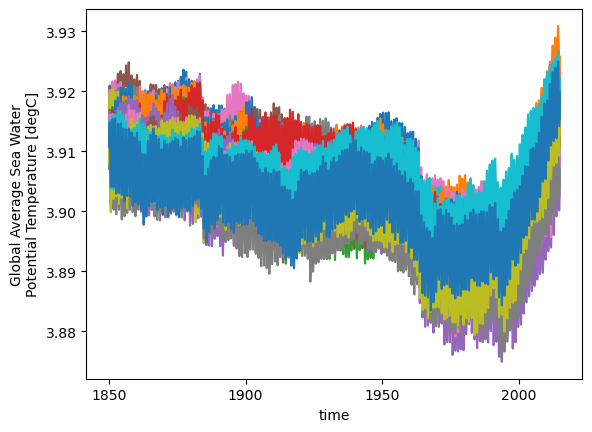

In [11]:
for sim in sims:
    ds = xc.open_mfdataset(sim)
    ds['thetaoga'].plot()

#ds8 = xc.open_mfdataset('/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r8i1p1f1/Omon/thetaoga/gr/v20230806/*', use_cftime=True)

## search for GFDL-CM4 historical sims

In [18]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
#print(dpaths.keys())
sims = xs.getValuesForFacet(dpaths, 'model', 'GFDL-CM4')
sims

['/p/css03/esgf_publish/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Omon/thetaoga/gn/v20180701/']

## check GFDL-CM4 global curves

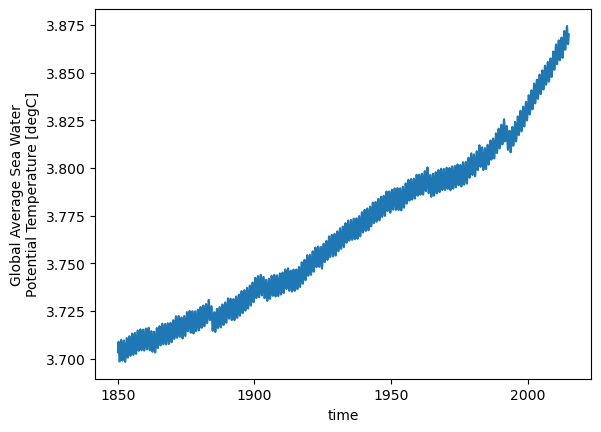

In [16]:
for sim in sims:
    ds = xc.open_mfdataset(sim)
    ds['thetaoga'].plot()

## search for ACCESS-CM2 historical sims

In [26]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
#for count, sim in enumerate(dpaths):
#    print("{:03d}".format(count), sim)
sims = xs.getValuesForFacet(dpaths, 'model', 'ACCESS-CM2')
sims

['/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r2i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r3i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r5i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r6i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r7i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r8i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r9i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_pub

## check ACCESS-CM2 global curves

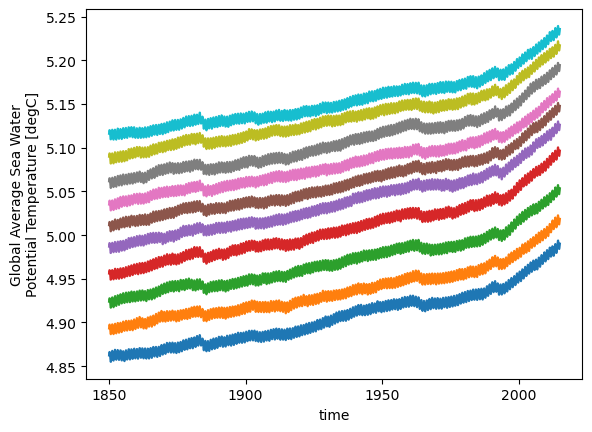

In [27]:
for sim in sims:
    ds = xc.open_mfdataset(sim)
    ds['thetaoga'].plot()